# PRACTICA GUIADA: Clustering Jerárquico

## 1. Introducción

Implementar un clustering jerárquico en Python es tan simple como llamar a una función de paquete SciPy.

```python
from scipy.cluster.hierarchy import linkage
Z = linkage(X, 'ward')
```

Aquí `X` es la matriz de datos con la que estamos trabajando y `'ward'` define el método para calcular la distancia entre los clusters. En este caso, se usa la distancia de Ward que minimiza la varianza incremental (entre los puntos de un cluster y sus respectivos centroides) al fusionar clusters. Al calcular la métrica especifica de distancia el método implementa por defecto la distancia euclidiana.

Luego de estimar los clusters, tendremos que calcular el dendrograma usando la función `dendrogram()` de SciPy y graficarlo en base a `plt` de `matplotlib`.

Para evaluar qué tan bien el algoritmo ha medido la distancia, podemos calcular coeficiente de correlación de copehenetic. Esta métrica cuantifica la correlación entre las distancias originales de los puntos y las distancias de entre los puntos (las alturas del dendograma en el punto en el cual las dos ramas se unen) y permite evaluar que tan bien ha funcionado el clustering.

```python
c, coph_dists = cophenet(Z, pdist(X))
```
Es posible llamar a la función que calcula el coeficiente desde SciPy y aplicar al set clusterizado (`Z`) y a la distancia de nuestro set original (`X`). 

### Recursos adicionales

* [Documentación de SciPy para análsis de clustering](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
* [¿Qué es un análisis de clustering jerárquico?](http://www.saedsayad.com/clustering_hierarchical.htm)

## 2. Preparando el análisis y trabajando con los datos

Vamos a trabajar sobre el dataset de Iris. Vamos a realizar un análisis de cluster jerárquico en este dataset.

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline

Vamos a usar SciPy para el análisis. Ya conocemos bastante bien el dataset, así que pasamos al análisis de los datos directamente...

In [2]:
from sklearn import datasets
data = datasets.load_iris(return_X_y=False)
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Extraemos los datos a una matriz para poder pasarlo al algoritmo de clustering. El formato matriz (o np.array) hace que sea más fácil para el algoritmo computar las distancias.

In [3]:
X = data.data
type(X)

numpy.ndarray

In [4]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Observamos los primeros 4 elementos del dataset:

X[:4, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [6]:
X.shape

(150, 4)

## 3. Calculando clusters

Implementamos el algoritmo de clustering jerárquico usando el método de `ward`

In [7]:
Z = linkage(X, 'ward')

La función linkage devuelva una matriz `Z` de `(n-1)x4`. En la iteración `i`, los clusters con índices `Z[i, 0]` y `Z[i, 1]` se combinan para formar el cluster `n + i`. Un cluster con un índice menor a `n` corresponde a una de las `n` observaciones originales. La distancia entre los clusters `Z[i, 0]` and `Z[i, 1]` la encontramos en `Z[i, 2]`. El cuarto valor `Z[i, 3]` representa el número de observaciones en el cluster que es está formando.

In [8]:
Z[:5,:]

array([[1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00],
       [9.00e+00, 3.40e+01, 1.00e-01, 2.00e+00],
       [1.28e+02, 1.32e+02, 1.00e-01, 2.00e+00]])

In [9]:
Z[-5:,:]

array([[282.        , 290.        ,   3.82805262,  50.        ],
       [287.        , 288.        ,   4.84770851,  36.        ],
       [292.        , 293.        ,   6.39940682,  64.        ],
       [295.        , 296.        ,  12.30039605, 100.        ],
       [294.        , 297.        ,  32.447607  , 150.        ]])

Ahora calculamos el coeficiente de corrrelación de cophenetic para evaluar que tan bien funcionó el cálculo de las medidas de distancia entre los puntos.

Primero veamos como calcular el vector de distancias de X, que es la expresión condensada de la matriz de distancias:

In [10]:
# Calculamos las distancias con la función pdist(X) que importamos de scipy:

pdist(X)

array([0.53851648, 0.50990195, 0.64807407, ..., 0.6164414 , 0.64031242,
       0.76811457])

In [11]:
# Vemos el shape de pdist(X)

# 149*150/2 = 11.175

pdist(X).shape

(11175,)

Si a la función `cophenet()` le pasamos solamente la matriz `Z`, nos devuelve el vector de distancias cophenéticas. Si además le pasamos el vector de distancias `pdist(X)`, nos devuelve también el coeficiente cophenético.

In [12]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.8728283153305715

In [13]:
coph_dists

array([ 3.82805262,  3.82805262,  3.82805262, ...,  1.76044502,
       12.30039605, 12.30039605])

In [14]:
coph_dists.shape

(11175,)

Deberían ver un C de alrededor de 0.87 lo que implica que las distancias entre los clusters están bastante correlacionadas con las distancias originales de los datos. Es decir, que el clustering parece conservar en buena medida la estructura de distancias de los datos originales.

Vamos a plotear un dendograma. Para hacer esto, hay que llamar al dendograma desde `scipy.cluster.hierarchy` y pasar como inputs los links y rotar las etiquetas para que podamos ver el gráfico de forma un poco más organizada. Podemos plotear el dendograma con `pyplot` de `matplotlib`


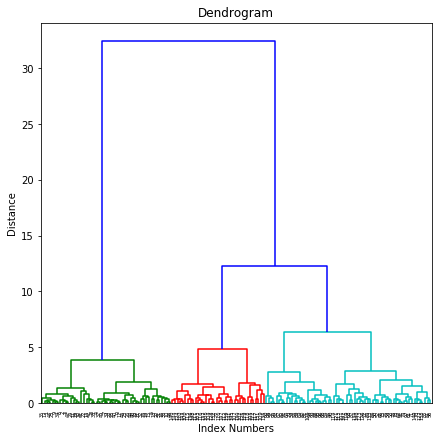

In [15]:
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,
    color_threshold=7.5,
)
plt.show()

El paso siguiente es determinar los clusters. Si bien hay muchas formas de automizar este proceso, una buena posibilidad es estimar los clusters (la cantidad) a través de un análisis visual del dendrograma. Esto ayudará, además, a entender la lógica y la estrucutra detrás de este tipo de gráficos.

Ahora bien, ¿cómo generamos los clusters finalmente?

1. definimos la cantidad de clusters que vamos a usar (inspeccionando el dendrograma)
2. usamos la función `fcluster` de la librería `scipy.cluster.hierarchy` que nos devuelve un array con la pertenencia de cada observación a un cluster.

¿Dónde setearían el número óptimo de clusters en este dendrograma?

In [16]:
max_dist = 7.5
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

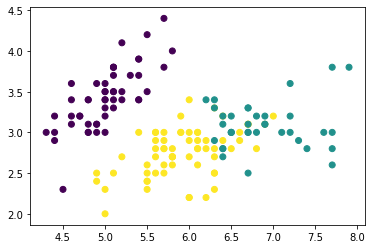

In [17]:
plt.scatter(X[:,0], X[:,1], c=clusters);

Ahora bien, en este caso, podemos ver que no existe un agrupamiento a una distancia mayor de aproximadamente 35. ¿Qué pasaría si seteamos la distancia máxima en ese punto?

In [18]:
max_dist = 35
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Por último, vamos a realizar un gráfico de las clusters...

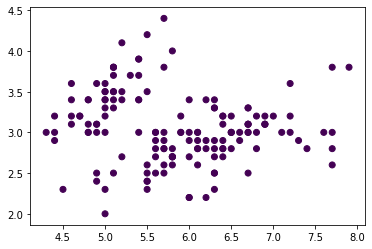

In [19]:
plt.scatter(X[:,0], X[:,1], c=clusters);

Para terminar veamos qué sucede si alteramos el método por el cual se generan los clusters. Probaremos con los siguientes linkages:

- ward
- average
- complete
- single

In [20]:
def eval_clusters_linkage(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    plt.figure(figsize=[6,6])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

ward 0.8728283153305715
single 0.8638786773076584
average 0.8769561464741983
complete 0.7269856836284624


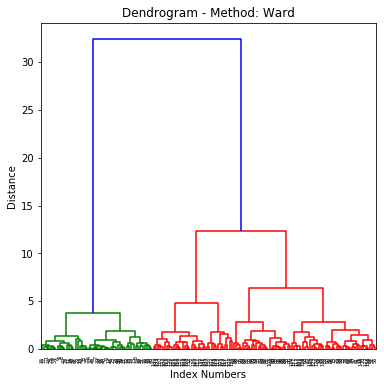

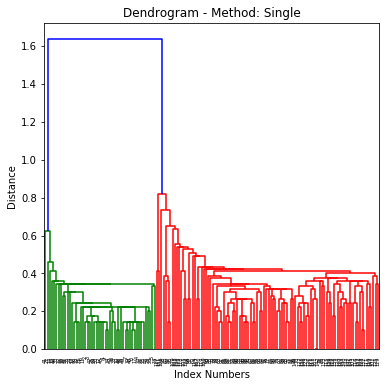

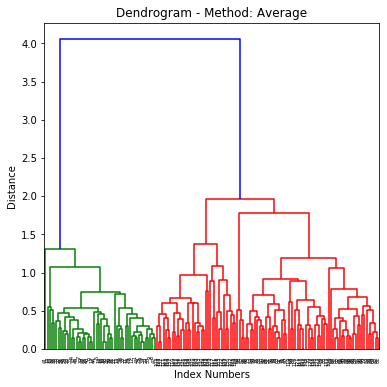

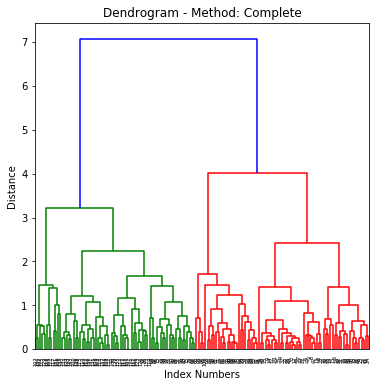

In [21]:
for i in ['ward','single','average','complete']:
    eval_clusters_linkage(X, i)